In [169]:
import timeit
import pandas as pd
import numpy as np
import time
import seaborn as sns
import re

In [2]:
df = pd.read_csv("../../target/distinct-salinity.tsv", sep='\t', header=None)

In [3]:
df = df.applymap(lambda x: x.strip() if type(x)==str else x)

In [4]:
df

,0,1
0,3377,Missing: Not provided
1,2325,not provided
2,1651,0
3,1032,55 g/L
4,762,NaN
...,...,...
5033,1,38.032
5034,1,34.093
5035,1,36.863
5036,1,33.8 PSU


In [5]:
df.describe()

,0
count,5038.000000
mean,5.851925
std,67.853603
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3377.000000


In [6]:
df.iloc[:,1]

0       Missing: Not provided
1                not provided
2                           0
3                      55 g/L
4                         NaN
                ...          
5033                   38.032
5034                   34.093
5035                   36.863
5036                 33.8 PSU
5037                  40.7121
Name: 1, Length: 5038, dtype: object

In [7]:
col = df.iloc[:,1]
frame = { 'salinity': col } 
dfcol = pd.DataFrame(frame) 

In [8]:
#check if whitespace trimming worked
df.loc[dfcol['salinity'].astype(str).str.isspace()]

,0,1


In [9]:
def isnum(x):
    try:
        float(x)
        return True
    except:
        return False


In [10]:
dfcol_reals = dfcol.apply(pd.to_numeric, errors='coerce')

In [11]:
dfcol_reals

,salinity
0,NaN
1,NaN
2,0.0000
3,NaN
4,NaN
...,...
5033,38.0320
5034,34.0930
5035,36.8630
5036,NaN


In [12]:
dfcol_reals.describe()

,salinity
count,3232.000000
mean,163.782794
std,3351.342712
min,-999.000000
25%,28.627500
50%,34.435650
75%,35.763225
max,164045.000000


In [13]:
dfcol_reals_descr = dfcol_reals.describe()
reals = dfcol_reals_descr.loc['count',]
#type(dfcol_reals)

dfcol_str = dfcol



<AxesSubplot:>

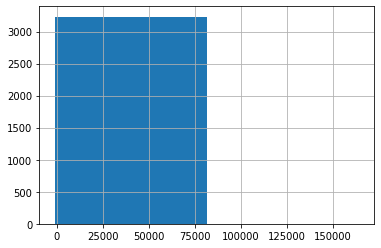

In [14]:
dfcol_reals['salinity'].hist(bins=2)

In [15]:
dfcol_reals[dfcol_reals['salinity'] < 0]

,salinity
40,-999.0


In [16]:
dfcol_reals[dfcol_reals['salinity'] > 100]

,salinity
18,999.000000
524,228.140000
576,228.000000
613,18741.000000
710,200.000000
...,...
4721,342.400000
4821,290.150000
4915,340.000000
4920,281.150000


In [17]:
dfcol_reals[(dfcol_reals['salinity'] < 100) & (dfcol_reals['salinity'] > 0)]

,salinity
7,35.0000
9,32.0000
10,34.0000
19,28.0000
22,0.1100
...,...
5031,32.4900
5033,38.0320
5034,34.0930
5035,36.8630


array([[<AxesSubplot:title={'center':'salinity'}>]], dtype=object)

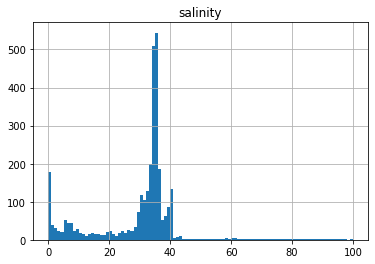

In [18]:
dfcol_reals[(dfcol_reals['salinity'] < 100) & (dfcol_reals['salinity'] > 0)].hist(bins=100)

In [19]:
dfcol

,salinity
0,Missing: Not provided
1,not provided
2,0
3,55 g/L
4,NaN
...,...
5033,38.032
5034,34.093
5035,36.863
5036,33.8 PSU


In [20]:
#dfcol_realmap = dfcol_reals.applymap(np.isreal)

dfcol.loc[dfcol['salinity'].astype(str).str.isalpha()]

,salinity
4,NaN
5,missing
20,NaN
25,NaN
28,Halophile
41,Unknown
88,FW
91,Halotolerant
409,nd
990,Stenohaline


In [21]:
dfcol.loc[~dfcol['salinity'].astype(str).str.isdigit() & (dfcol['salinity'].str.find(".")) ]

,salinity
0,Missing: Not provided
1,not provided
3,55 g/L
5,missing
6,not collected
...,...
5033,38.032
5034,34.093
5035,36.863
5036,33.8 PSU


In [22]:
dfcol.loc[dfcol['salinity'].astype(str).str.isalnum() | dfcol['salinity'].astype(str).str.isalpha()]

,salinity
2,0
4,NaN
5,missing
7,35
9,32
...,...
4674,54
4830,51
4857,73
4915,340


In [23]:
unitindex = dfcol['salinity'].str.contains("/")
unitindex[unitindex.isnull()] = "False"
type(unitindex)
unitindex.name = 'salinity'
unitindex

0       False
1       False
2       False
3        True
4       False
        ...  
5033    False
5034    False
5035    False
5036    False
5037    False
Name: salinity, Length: 5038, dtype: object

In [24]:
dfcol['salinity'].where(dfcol['salinity'].str.contains("/") | dfcol['salinity'].str.contains("%")).dropna()

3                  55 g/L
11                 400g/L
12                  70g/L
13                 110g/L
17                 100g/L
              ...        
4829              120 g/L
4855               0-35 %
4894    2.0 percent (w/v)
4897               27 g/L
4988              6.6 g/L
Name: salinity, Length: 172, dtype: object

In [70]:
values_w_units = dfcol['salinity'].where(dfcol['salinity'].str.contains("/") | dfcol['salinity'].str.contains("%") | dfcol['salinity'].str.contains("percent")).dropna()

In [71]:
len(values_w_units)

172

In [122]:
def pick_numeric_vs_wunit(instr):
    if instr is None:
        return None
    else:
        #print("start")
        #spa_ind = instr.find(" ")
        #print(spa_ind)
        #if(spa_ind != -1):
        #    try:
        #        return float(instr[0 : spa_ind])     
        #    except:
        #        print("FAILED not float")
        #else:
        #
        #^0$|^[1-9]\d*$|^\.\d+$|^0\.\d*$|^[1-9]\d*\.\d*$
        #digits = re.match("([0-9]*)",instr).groups()[0]
        #digits = re.match("(\d+\.?\d*)",instr)
        #(^[+-]?(([0-9]*)?[0-9](\.[0-9]*)?|\.[0-9]+))
        digits_matches = re.match("(^[+-]?(([0-9]+)?\.([0-9]+)))",instr)#?\d+*
        digits_w_string_matches = re.match("(^[+-]?(([0-9]+)?\.([0-9]+))*)", instr)#r'\D'
        
        try:
            char_ind = re.search(r"\D", instr)#instr.index("/\D/")
            spa_ind = re.search(r" ", instr)
            
            char_span = char_ind.span()
            print("char_ind %s ",char_ind)
            print("char_span %s ",char_span)
            
            spa_span = spa_ind.span()
            print("spa_ind %s ",spa_ind)
            print("spa_span %s ",spa_span)
            
            print("0 %s ",spa_span[0])
            print("0 %s ",char_span[0])
            
            if(spa_span):                
                number = instr[0:(spa_span[0])]
                string = instr[(spa_span[0]+1):]                
            elif(char_span):
                number = instr[0:(char_span[0])]
                string = instr[(char_span[0]+1):]
                
            print("number, string %s %s ",number , string)
            
            return (number, string)
            
        except:
            print("NO ",instr)
        
        #if(digits_matches is not None):
        #    digits = digits_matches.groups()[0]
        #    print("digits %s ", digits)
            #digits_w_string = digits_w_string_matches.groups()[0]
            #print("digits_w_string %s ", digits_w_string)                      

        #    if digits.isdigit():
        #        try:
        #            return float(digits)
        #        except:
        #            print("FAILED not float")
        #            return int(digits)
        #    else:
        #         print("FAILED not isdigit() %s ",digits)
                    
        #if(digits_w_string_matches is not None):
        #    digits_w_string = digits_w_string_matches.groups()[0]
        #    print("digits_w_string %s ", digits_w_string_matches)  
        #else:
        #    return None

success = 0
for string in values_w_units:
    print(string)
    result = pick_numeric_vs_wunit(string)
#   result = pick_unit(string)
    if result is not None:
        print("Matched : %s %s ".format(result, string))
        success = success + 1
        
print("success %s",success)

55 g/L
char_ind %s  <re.Match object; span=(2, 3), match=' '>
char_span %s  (2, 3)
spa_ind %s  <re.Match object; span=(2, 3), match=' '>
spa_span %s  (2, 3)
0 %s  2
0 %s  2
number, string %s %s  55 g/L
Matched : %s %s 
400g/L
char_ind %s  <re.Match object; span=(3, 4), match='g'>
char_span %s  (3, 4)
NO  400g/L
70g/L
char_ind %s  <re.Match object; span=(2, 3), match='g'>
char_span %s  (2, 3)
NO  70g/L
110g/L
char_ind %s  <re.Match object; span=(3, 4), match='g'>
char_span %s  (3, 4)
NO  110g/L
100g/L
char_ind %s  <re.Match object; span=(3, 4), match='g'>
char_span %s  (3, 4)
NO  100g/L
1%
char_ind %s  <re.Match object; span=(1, 2), match='%'>
char_span %s  (1, 2)
NO  1%
4%
char_ind %s  <re.Match object; span=(1, 2), match='%'>
char_span %s  (1, 2)
NO  4%
6 g/L
char_ind %s  <re.Match object; span=(1, 2), match=' '>
char_span %s  (1, 2)
spa_ind %s  <re.Match object; span=(1, 2), match=' '>
spa_span %s  (1, 2)
0 %s  1
0 %s  1
number, string %s %s  6 g/L
Matched : %s %s 
2 %
char_ind %s  <

number, string %s %s  8.6 g/L
Matched : %s %s 
6.3 g/L
char_ind %s  <re.Match object; span=(1, 2), match='.'>
char_span %s  (1, 2)
spa_ind %s  <re.Match object; span=(3, 4), match=' '>
spa_span %s  (3, 4)
0 %s  3
0 %s  1
number, string %s %s  6.3 g/L
Matched : %s %s 
36.4%
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
NO  36.4%
21.5%
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
NO  21.5%
120 g/L
char_ind %s  <re.Match object; span=(3, 4), match=' '>
char_span %s  (3, 4)
spa_ind %s  <re.Match object; span=(3, 4), match=' '>
spa_span %s  (3, 4)
0 %s  3
0 %s  3
number, string %s %s  120 g/L
Matched : %s %s 
0-35 %
char_ind %s  <re.Match object; span=(1, 2), match='-'>
char_span %s  (1, 2)
spa_ind %s  <re.Match object; span=(4, 5), match=' '>
spa_span %s  (4, 5)
0 %s  4
0 %s  1
number, string %s %s  0-35 %
Matched : %s %s 
2.0 percent (w/v)
char_ind %s  <re.Match object; span=(1, 2), match='.'>
char_span %s  (1, 2)
spa_ind %s  <r

In [28]:
print(values_w_units.sort_values(ascending=True))

593        &gt;50%
169            0 %
4593      0 to 9 %
2475            0%
4855        0-35 %
           ...    
3586    {1.03} {%}
2672    {16.6} {%}
2803    {19.1} {%}
2304    {19.4} {%}
4671    {4.76} {%}
Name: salinity, Length: 172, dtype: object


In [29]:

def split_num_str(s):
    return list(filter(None, re.split(r'(\d+\.?\d+)', s)))

store = []
for string in values_w_units:
    print(string)
    split = split_num_str(string)
    print(split)
    if(len(split) == 2):
        store.append(split)
    
value_unit_df = pd.DataFrame(store, columns = ['value', 'unit']) 


55 g/L
['55', ' g/L']
400g/L
['400', 'g/L']
70g/L
['70', 'g/L']
110g/L
['110', 'g/L']
100g/L
['100', 'g/L']
1%
['1%']
4%
['4%']
6 g/L
['6 g/L']
2 %
['2 %']
0/NA
['0/NA']
0 %
['0 %']
30 g/l
['30', ' g/l']
4 %
['4 %']
400 g/L
['400', ' g/L']
30%
['30', '%']
143 dS/m
['143', ' dS/m']
157 dS/m
['157', ' dS/m']
139 dS/m
['139', ' dS/m']
20-32%
['20', '-', '32', '%']
2-17%
['2-', '17', '%']
28-32%
['28', '-', '32', '%']
0.68 dS/m
['0.68', ' dS/m']
3.23 g/dm3
['3.23', ' g/dm3']
5 %
['5 %']
0.5 g/dm3
['0.5', ' g/dm3']
2.6 g/dm3
['2.6', ' g/dm3']
7.6 g/dm3
['7.6', ' g/dm3']
0.3 g/dm3
['0.3', ' g/dm3']
3.01 g/dm3
['3.01', ' g/dm3']
7.5 g/dm3
['7.5', ' g/dm3']
6.87 g/dm3
['6.87', ' g/dm3']
7.1 g/dm3
['7.1', ' g/dm3']
0.4 g/dm3
['0.4', ' g/dm3']
0.1 g/L
['0.1', ' g/L']
&gt;50%
['&gt;', '50', '%']
3 %
['3 %']
0.48 g/dm3
['0.48', ' g/dm3']
1.08 dS/m
['1.08', ' dS/m']
1.3 dS/m
['1.3', ' dS/m']
1.22 dS/m
['1.22', ' dS/m']
3.87%
['3.87', '%']
3% NaCl
['3% NaCl']
{0.0} {%}
['{', '0.0', '} {%}']
1% NaCl


In [30]:
value_unit_df.describe()

,value,unit
count,127,127
unique,109,12
top,28,g/L
freq,3,34


In [31]:
value_unit_df

,value,unit
0,55,g/L
1,400,g/L
2,70,g/L
3,110,g/L
4,100,g/L
...,...,...
122,21.5,%
123,120,g/L
124,2.0,percent (w/v)
125,27,g/L


In [32]:
unit_list = value_unit_df['unit'].unique()

In [33]:
unit_list

array([' g/L', 'g/L', ' g/l', '%', ' dS/m', ' g/dm3', ' %',
       ' percent (w/v)', '%+ NaCl', ' mg/kg', '-4 %', ' mg/L'],
      dtype=object)

In [34]:
type(unit_list)

numpy.ndarray

In [35]:
np.char.strip(unit_list)

TypeError: string operation on non-string array

In [60]:
# map(lambda x: x.strip(), unit_list)
    
unit_list = [x.strip() for x in unit_list]
unit_list_lower = [x.lower() for x in unit_list]
unit_list_lower = list(set(unit_list_lower))

print(unit_list_lower)

['%', 'mg/kg', '%+ nacl', 'percent (w/v)', 'g/l', 'ds/m', '-4 %', 'mg/l', 'g/dm3']


In [37]:
###first mapping pass

mg/L * 1000 = g/L
g/l = g/L
g/L = g/L
g/dm3 = g/L
mg/kg = g/L
dS/m =
percent (w/v) =


SyntaxError: invalid syntax (<ipython-input-37-52091aa1e6a9>, line 8)

In [61]:

sum = 0

salinity_lower = dfcol['salinity'].str.lower()
for i in range(0,len(unit_list_lower)):

    #indices = np.where(dfcol['salinity'].isin([unit_list[i]]))
    #print(unit_list[i])
    #print(len(indices))
    #print(indices)
    
    #print(df[(df==unit_list[i])].dropna(how='all').index)
    
    print(unit_list_lower[i])
    results = salinity_lower[salinity_lower.str.contains(unit_list_lower[i], na=False)]
    lenr = len(results)
    sum = sum + lenr
    print(lenr)
    #print(results)
    
    

print("sum %s len(dfcol['salinity']) %s covered %s " % (sum, len(dfcol['salinity']), (sum/len(dfcol['salinity']))))
    

%
77
mg/kg
2
%+ nacl
5
percent (w/v)
0
g/l
49
ds/m
10
-4 %
1
mg/l
2
g/dm3
14
sum 160 len(dfcol['salinity']) 5038 covered 0.031758634378721715 


In [57]:
salinity_lower

0       missing: not provided
1                not provided
2                           0
3                      55 g/l
4                         NaN
                ...          
5033                   38.032
5034                   34.093
5035                   36.863
5036                 33.8 psu
5037                  40.7121
Name: salinity, Length: 5038, dtype: object

In [52]:
col = df.iloc[:,1]
frame = { 'salinity': col } 
dfcol = pd.DataFrame(frame) 
dfcol_reals = dfcol.apply(pd.to_numeric, errors='coerce')
#dfcol_reals.describe(include='all')
real_na = dfcol_reals.isna().sum()
real_len = len(dfcol_reals)
print("na %s ", real_na)
print("real %s ", real_len - real_na)
print("total %s ",)

na %s  salinity    1806
dtype: int64
real %s  salinity    3232
dtype: int64
total %s  5038


In [152]:
dfcol['salinity']

0       Missing: Not provided
1                not provided
2                           0
3                      55 g/L
4                         NaN
                ...          
5033                   38.032
5034                   34.093
5035                   36.863
5036                 33.8 PSU
5037                  40.7121
Name: salinity, Length: 5038, dtype: object

In [200]:
dfcol_lower = dfcol["salinity"].str.lower()#map(lambda x: x.lower() if(x == str)  else x)
dfcol_lower

0       missing: not provided
1                not provided
2                           0
3                      55 g/l
4                         NaN
                ...          
5033                   38.032
5034                   34.093
5035                   36.863
5036                 33.8 psu
5037                  40.7121
Name: salinity, Length: 5038, dtype: object

In [204]:
#salinity
#4	NaN
#5	missing
#20	NaN
#25	NaN
#28	Halophile
#41	Unknown
#88	FW
#91	Halotolerant
#409	nd
#990	Stenohaline
#2147	unknown
#3061	xx
#3647	Original

#Halophile, FW, Halotolerant, Stenohaline
missing_strings = ["missing: not provided", "not provided", "none", "missing","unknown","nd","xx","NaN"]
print("NA %s", dfcol_lower.isna().sum())
i = 0
len_now = len(missing_strings)
for i in range(0,len_now):
    print(clean_strings[i])
    dfNone = dfcol_lower.str.match(missing_strings[i])
    #dfNone[dfNone == np.NaN] = False
    print(len(dfNone))
    print(dfNone.value_counts())
    #dfcol_lower[dfNone] = np.NaN

NA %s 3
missing: not provided
5038
False    5033
True        2
Name: salinity, dtype: int64
not provided
5038
False    5034
True        1
Name: salinity, dtype: int64
none
5038
False    5035
Name: salinity, dtype: int64
missing
5038
False    5030
True        5
Name: salinity, dtype: int64
unknown
5038
False    5033
True        2
Name: salinity, dtype: int64
nd
5038
False    5034
True        1
Name: salinity, dtype: int64
xx
5038
False    5034
True        1
Name: salinity, dtype: int64
NaN
5038
False    5035
Name: salinity, dtype: int64


In [ ]:
dfcol_lower

In [214]:

#mg/l * 1000 = g/l
#g/dm3 = g/l
#mg/kg = g/l
#dS/m = g/l
#percent (w/v) = Liquid? Solid (dry weight)? = g / 100 mL = 10 * g/L
#psu = mg/kg * 1000 = g/l


def mg_per_l__to__g_per_l(x):
    return x * 1000

def g_per_dm3__to__g_per_l(x):
    return x

def mg_per_kg__to__g_per_l(x):
    return x * 1000

def ds_per_m__to__g_per_l(x):
    return x * 550
#https://landscape.sa.gov.au/mr/publications/measuring-salinity

def percent__to__g_per_l(x):
    return x * 10
def percent_nacl__to__g_per_l(x):
    return x * 10
def percent_w_by_v__to__g_per_l(x):
    return x * 10
#https://www.labce.com/spg913555_calculating_percent_weightvolume__wv.aspx

def psu__to__g_per_l(x):
    return x
#http://www.salinityremotesensing.ifremer.fr/sea-surface-salinity/definition-and-units

#unit_list_lower
unit_list_lower =['%',
 'mg/kg',
 '%+ nacl',
 'percent (w/v)',
 'g/l',
 'ds/m',
 '-4 %',
 'mg/l',
 'g/dm3']

unit_percent = ['%',
 '%+ nacl',
 'percent (w/v)']


In [215]:
for unit in unit_list_lower:
    #dfcol_lower_new = lambda x: dfcol_lower[dfcol_lower.str.find(unit)]
    if(unit in unit_percent):
        dfcol_lower.str.find(unit).map(lambda x: percent__to__g_per_l(x),
            na_action='ignore')
    elif(unit in ['mg/kg', 'mg/l']):
        dfcol_lower.str.find(unit).map(lambda x: mg_per_kg__to__g_per_l(x),
            na_action='ignore')
    elif(unit in ['ds/m']):
        dfcol_lower.str.find(unit).map(lambda x: ds_per_m__to__g_per_l(x),
            na_action='ignore')
    elif(unit in ['g/dm3']):
        dfcol_lower.str.find(unit).map(lambda x: g_per_dm3__to__g_per_l(x),
            na_action='ignore')
    elif(unit in ['psu']):
        dfcol_lower.str.find(unit).map(lambda x: psu__to__g_per_l(x),
            na_action='ignore')